# Transformada Rápida de Fourier

Vamos iniciar relembrando que a Transformada Discreta de Fourier (DFT) é uma representação **discreta** do espectro de frequências de sinais no tempo discreto $x(n)$, cuja expressão é dada por:

$$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn},$$ sendo $W_N = e^{-j\frac{2\pi}{N}}$

e para calcular cada valor $X[k]$ são necessários
1. $N$ multiplicações complexas, e
2. $N-1$ adições complexas.


Para obter todos os coeficientes $X[k]$, $k = 0, ..., N-1$ são necessários
1. $N^2$ multiplicações complexas, e
2. $(N-1)N$ adições complexas.

Por isso dizemos que a DFT tem complexidade $O(N^2)$.

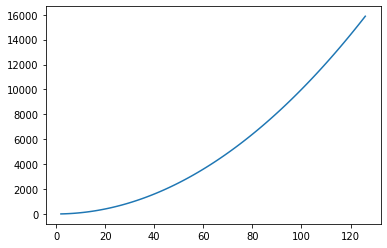

In [31]:
import numpy as np
import matplotlib.pyplot as mplib
N = 128;
n = range(2,N-1)
mplib.plot(n, np.power(n, 2))

Em 1965, é proposto um algoritmo rápido que reduz a complexidade do calculo da DFT para $O(N.log_2 N)$.

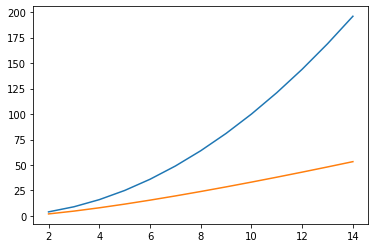

In [33]:
import numpy as np

import matplotlib.pyplot as mplib
N = 16;
n = range(2,N-1)
mplib.plot(n, np.power(n, 2))
mplib.plot(n, n*np.log2(n))

Esses algoritmos ficaram conhecidos como **Transformada Rápida de Fourier**, ou simplesmente **FFT** de Fast Fourier Transform.

Os Algoritmos da FFT exploram as seguintes características:

1. Simetria complexa conjugada: $W_N^{k(N-n)} = W_n^{-kn} = (W_N^{kn})^*$, ($()^*$ significa o conjugado complexo), e;
2. Periodicidade em $k$ e $n$: $W_N^{kn} = W_N^{k(N + n)} = W_N^{(k + N)n}$.

E a decomposição de uma DFT de $N$ pontos em DFTs de tamanhos menores.

Classes básicas:
    
1. FFT com decimação no tempo: $x(n)$ é sucessivamente decomposto em sequências menores
2. FFT com decimação em frequência : $X[k]$ é decomposto em sequências menores
    
Algoritmos:
    
1. Goertzel(1958): $O(N^2)$
2. **Cooley-Tukey(1965): Deu origem à decimação no tempo**
3. Sande-Tukey(1966): Deu origem à decimação em frequência


## FFT por Decimação no tempo

Decomposição sucessiva de $x(n)$ em tamanhos menores, e para tanto se convenciona utilizar $N = 2^l$, sendo $l$ um inteiro positivo.

### Algoritmo Raiz de 2 com decimação no tempo

O sinal $x(n)$ de $N$ pontos é dividido em 2 sequências de $N/2$ pontos, uma relativa aos índices **pares** e outra relativa aos índices **impares**, assim

$X[k] = \sum\limits_{n=0}^{N-1}x(n)W_N^{kn}$

após a divisão

$X[k] = \sum\limits_{n\ par}^{N/2-1}x(n)W_N^{kn} + \sum\limits_{n\ ímpar}^{N/2-1}x(n)W_N^{kn}$

fazendo:
$n = 2r$ para $n$ par, e;

$n = (2r + 1)$ para $n$ ímpar,

temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)W_N^{k2r} + \sum\limits_{r=0}^{N/2-1}x(2r+1)W_N^{k(2r+1)}$

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_N^2)^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_N^2)^{k r}$

Como $W_N^2 = W_{N/2}$ temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x(2r)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x(2r+1)(W_{N/2})^{k r}$

representando as componentes pares e ímpares de $x(n)$ por

$x_e(n) = x(2n)$, $n = 0, 1, ..., N/2 -1$, e

$x_o(n) = x(2n + 1)$, $n = 0, 1, ..., N/2 -1$

Temos

$X[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r} + W_N^k\sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

Vamos chamar:

$X_e[k] = \sum\limits_{r=0}^{N/2-1}x_e(n)(W_{N/2})^{k r}$,e 

$X_o[k] = \sum\limits_{r=0}^{N/2-1}x_o(n)(W_{N/2})^{k r}$

cada uma sendo uma DFT de $N/2$ pontos

e

$X[k] = X_e[k] + W_n^kX_o[k]$

sendo $X_e[k] = X_e[k + N/2]$ e $X_o[k] = X_o[k + N/2]$

**Fazendo $N = 2$**

pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{1}x(n)W_2^{0} = x(0) + x(1)$

$X[1] = \sum\limits_{n=0}^{1}x(n)W_2^{1} = x(0) - x(1)$

Usando e FFT temos 

$X[0] = X_e[0] + W_2^0 X_o[0] = X_e[0] + X_o[1] = x(0) + x(1)$

$X[1] = X_e[1] + W_2^1 X_o[1] = X_e[0] + W_2^1 X_o[0] = x(0) - x(1)$

![title](img/FFTN2.png)

**Fazendo $N = 4$**

pelo cálculo da DFT temos:

$X[0] = \sum\limits_{n=0}^{1}x(n)W_4^{0} = x(0) + x(1) + x(2) + x(3) = x(0) + x(2) + x(1) + x(3)$

$X[1] = \sum\limits_{n=0}^{1}x(n)W_4^{n} = x(0) + x(1)W_4^{1}  + x(2)W_4^{2} + x(3)W_4^{3}$

$X[2] = \sum\limits_{n=0}^{1}x(n)W_4^{2n} = x(0) + x(1)W_4^{2} + x(2W_4^{4}) + x(3)W_4^{6}$

$X[3] = \sum\limits_{n=0}^{1}x(n)W_4^{3n} = x(0) + x(1)W_4^{3} + x(2)W_4^{6} + x(3)W_4^{9}$

Usando e FFT temos 

$X[0] = X_e[0] + W_4^0 X_o[0]$ 

$X[1] = X_e[1] + W_4^1 X_o[1]$ 

$X[2] = X_e[2] + W_4^2 X_o[2] = X_e[0] + W_4^2 X_o[0]$

$X[2] = X_e[3] + W_4^3 X_o[3] = X_e[1] + W_4^3 X_o[1]$



Vamos fazer N = 8, e temos

$X[0] = X_e[0] + W_8^0 X_o[0]$

$X[1] = X_e[1] + W_8^1 X_o[1]$

$X[2] = X_e[2] + W_8^2 X_o[2]$

$X[3] = X_e[3] + W_8^3 X_o[3]$

$X[4] = X_e[4] + W_8^4 X_o[4] \longrightarrow X[4] = X_e[0] + W_8^4 X_o[0] $

$X[5] = X_e[5] + W_8^5 X_o[5] \longrightarrow X[5] = X_e[1] + W_8^5 X_o[1]$

$X[6] = X_e[6] + W_8^5 X_o[6] \longrightarrow X[6] = X_e[2] + W_8^5 X_o[2]$

$X[7] = X_e[7] + W_8^5 X_o[7] \longrightarrow X[7] = X_e[3] + W_8^5 X_o[3]$

![title](img/FFTN8.png)